In [1]:
# Importing the librairies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Let's download the datasets and saved them in the data subfolder

dataset_path = "eyramkueviakoe/sales-data"
output_dir = "./data"

os.system(f"kaggle datasets download -d {dataset_path} -p {output_dir} --unzip")
print(f"Dataset downloaded to {output_dir}")

Dataset downloaded to ./data


In [4]:
# Importing the datasets into pandas
sales_adv = pd.read_csv('./data/sales_adv.csv', sep=',', encoding='latin1')
car_sales = pd.read_csv('./data/car_sales.csv', sep=',', encoding='latin1')

In [5]:
# Checking the first rows of the dataset
print("Sales and Advertising Data (sales_adv):")
print(sales_adv.head())
print("\nCar Sales Data (car_sales):")
print(car_sales.head())

Sales and Advertising Data (sales_adv):
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Car Sales Data (car_sales):
     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  C

In [6]:
# Checking for missing values
print("\nMissing values in Sales and Advertising Data:")
print(sales_adv.isnull().sum())
print("\nMissing values in Car Sales Data:")
print(car_sales.isnull().sum())


Missing values in Sales and Advertising Data:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Missing values in Car Sales Data:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [7]:
# Let's select the features we need for clustering
features = car_sales[['age', 'annual Salary', 'net worth']]

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
# Applying kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
car_sales['Cluster'] = kmeans.fit_predict(features_scaled)

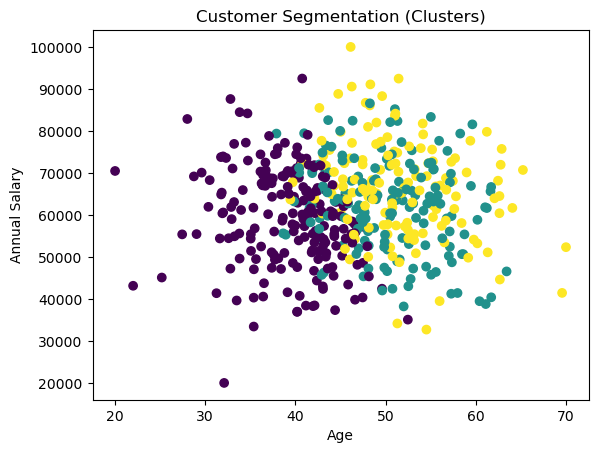

In [9]:
# Let's plot the clusters
plt.scatter(car_sales['age'], car_sales['annual Salary'], c=car_sales['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Customer Segmentation (Clusters)')
plt.show()

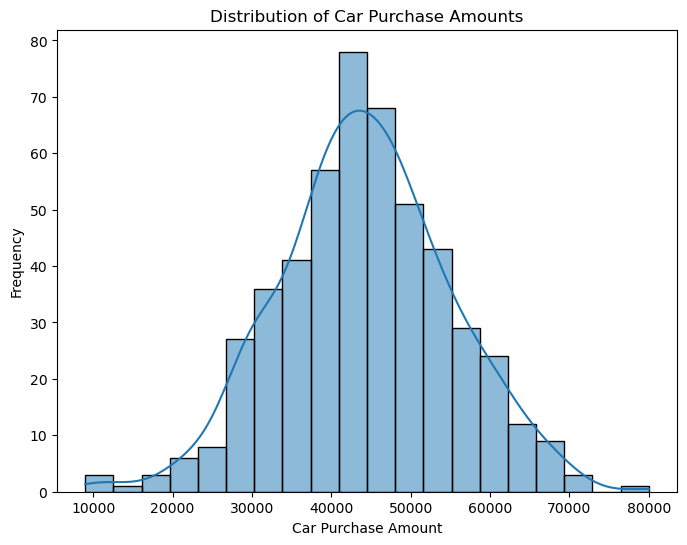

In [10]:
# Histogram of car purchase amounts
plt.figure(figsize=(8, 6))
sns.histplot(car_sales['car purchase amount'], kde=True, bins=20)
plt.title('Distribution of Car Purchase Amounts')
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.show()


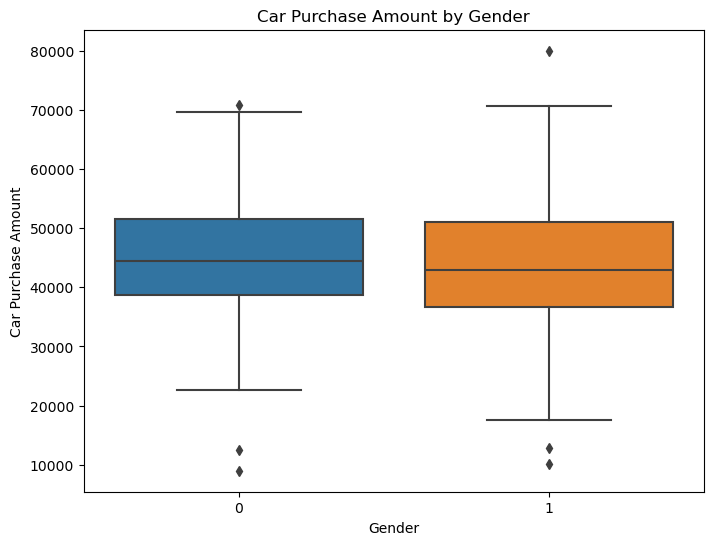

In [11]:
# Boxplot for car purchase amount by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='car purchase amount', data=car_sales)
plt.title('Car Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Car Purchase Amount')
plt.show()

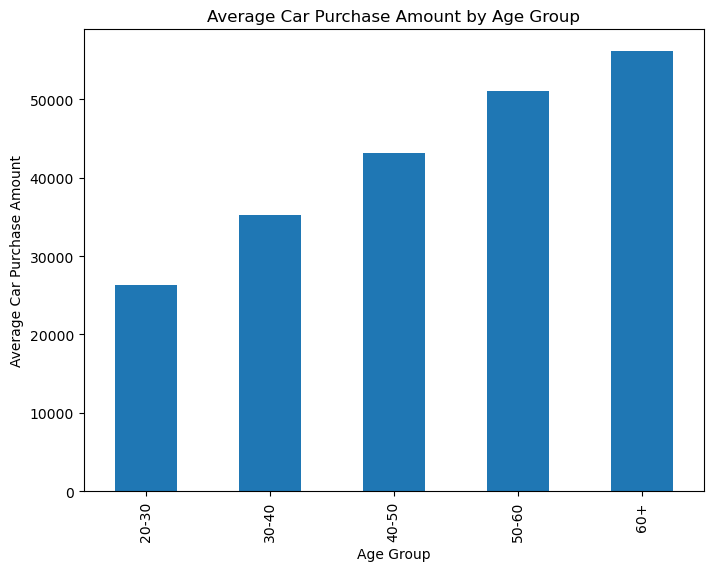

In [12]:
# Groupping by age
car_sales['age_group'] = pd.cut(car_sales['age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
age_group_purchase = car_sales.groupby('age_group')['car purchase amount'].mean()

# Average purchase amount by age group
age_group_purchase.plot(kind='bar', figsize=(8, 6))
plt.title('Average Car Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Car Purchase Amount')
plt.show()

In [13]:
# Select features (excluding non-numeric columns)
X = car_sales[['age', 'annual Salary', 'net worth']]
y = car_sales['car purchase amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.0485411910176747


In [14]:
# Features engineering
# Features
X = sales_adv[['TV', 'Radio', 'Newspaper']]
# Target
y = sales_adv['Sales']

In [15]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training a model
model = LinearRegression()

# Training the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Making predictions
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

#R-Squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f"R-Squared score: {r2}")


Mean Squared Error (MSE): 2.907756910271091
R-Squared score: 0.9059011844150826


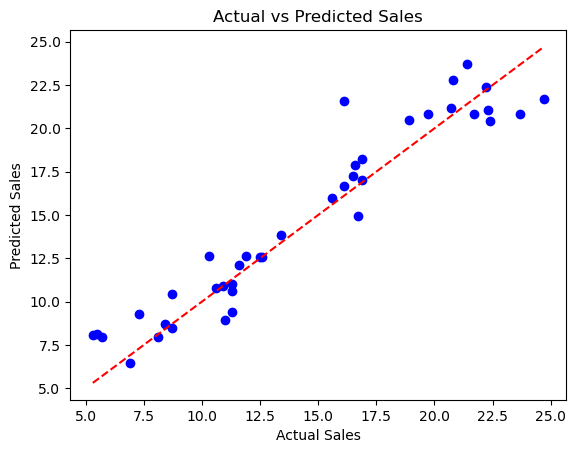

In [18]:
# Model performance
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [19]:
# Let's try the model on a new data
# As example, TV=100, Radio=50, Newspaper=30
new_data = np.array([[100, 50, 30]])

In [20]:
new_prediction = model.predict(new_data)
print(f"\nPredicted Sales for new data (TV=100, Radio=50, Newspaper=30): {new_prediction[0]}")


Predicted Sales for new data (TV=100, Radio=50, Newspaper=30): 15.342421010244918
